In [26]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import cm
import glob
import os 

In [42]:

class Log: 

    def __init__(self, full_path=None, unix_file=False): 

        self.experiment_name = None
        self.timestamp = None
        self.stage = None
        self.threshold = None
        self.path = full_path 
        self.unix_file = unix_file
        if full_path is not None: 
            _, log_title = os.path.split(full_path)
            details = log_title.split("_")
            self.timestamp = details[0][len(details[0]) - 19:]
            self.stage = int(details[1][5:])
            j = 0 
            while details[2][j] != ".": 
                j += 1 
            self.threshold = float(details[2][6:j]) / 100.0

In [53]:

IS_UNIX_FILE_SYSTEM = False
LOGS_FILE_PATH = f"{os.path.dirname(os.getcwd())}\\logs\\heatmaps\\fazildgr8\\*.txt"

log_objects = [Log(full_path=file_path, unix_file=IS_UNIX_FILE_SYSTEM) for file_path in glob.glob(LOGS_FILE_PATH)]

log_objects.sort(key=lambda el: el.stage)
# Assuming each experiment had the same amount of stages completed, we can find the highest stage 
# and figure out the number of experiments/sample size n 
highest_stage = -1
for i in range(len(log_objects)):
    if highest_stage < log_objects[i].stage: 
        highest_stage = log_objects[i].stage
num_experiments = len(log_objects) // (highest_stage + 1) 

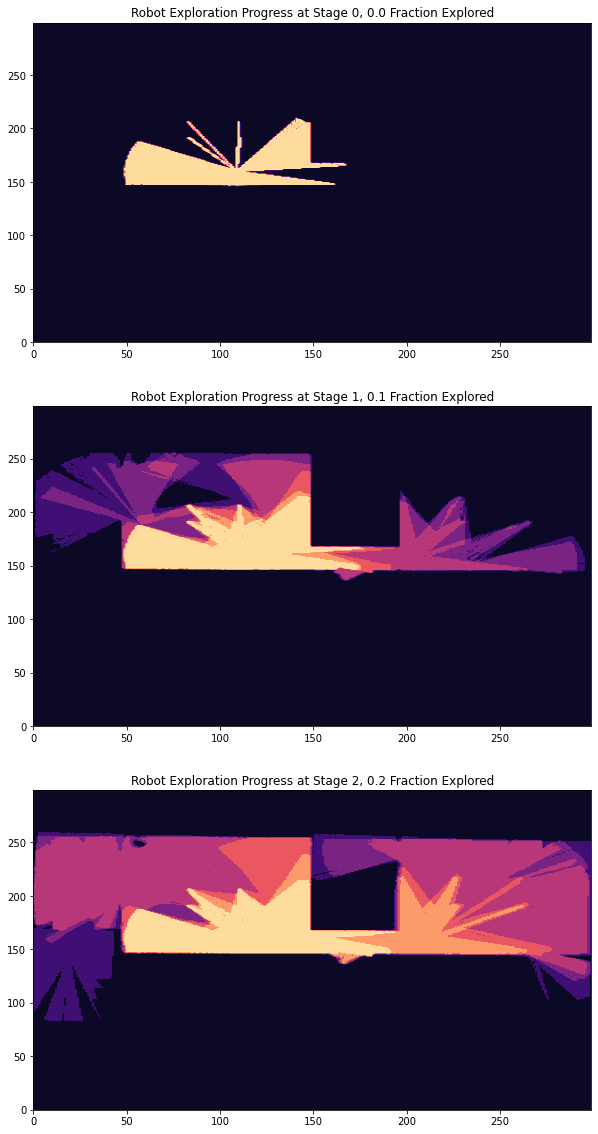

In [54]:
fig, axs = plt.subplots(highest_stage + 1, 1, figsize= (10,20))
for i in range(0, highest_stage + 1):    
    arr = None
    for j in range(num_experiments): 
        if arr is None: 
            arr = (np.loadtxt(log_objects[j + i * num_experiments].path) >= 0) / num_experiments
        else:
            arr += (np.loadtxt(log_objects[j + i * num_experiments].path) >= 0) / num_experiments
    axs[i].contourf(arr, cmap=cm.magma)
    axs[i].set_title(f"Robot Exploration Progress at Stage {i}, {log_objects[i * num_experiments].threshold} Fraction Explored")
